In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


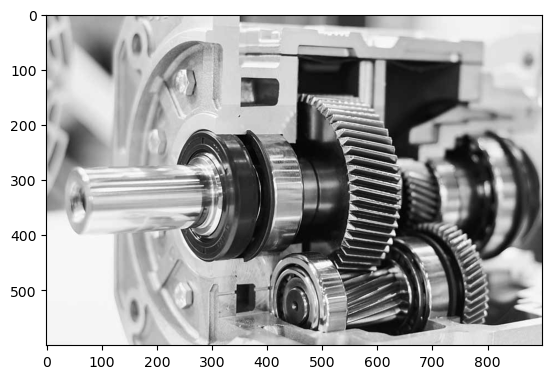

In [2]:
# read image
img = cv2.imread('../datasets/transmission.jpg', cv2.IMREAD_GRAYSCALE)

Ny, Nx = img.shape

plt.imshow(img, cmap='gray')

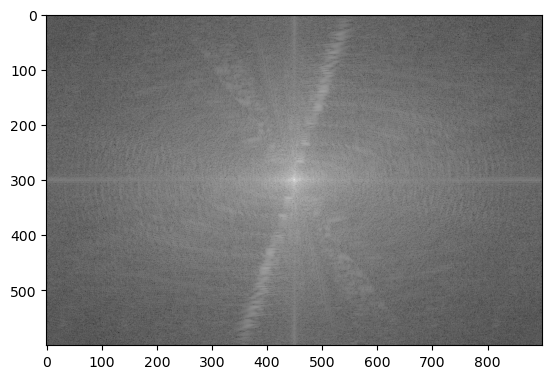

In [3]:
fft_img = np.fft.fft2(img)
fft_img_shift = np.fft.fftshift(fft_img)

plt.imshow(np.log1p(np.abs(fft_img_shift)), cmap='gray')

complex128


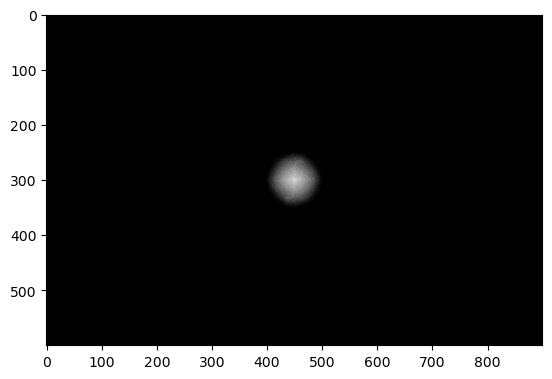

In [8]:
def gaussian(image, d0=10):
    P, Q = image.shape
    U, V = np.mgrid[0:P, 0:Q]
    D = np.sqrt((U - P/2) ** 2 + (V - Q/2) ** 2)
    H = np.exp(-(D**2) / (2*(d0**2)))
    return np.multiply(image,  H)

fft_img_shift_blur = gaussian(fft_img_shift)

print(fft_img_shift.dtype)

plt.imshow(np.log1p(np.abs(fft_img_shift_blur)), cmap='gray')

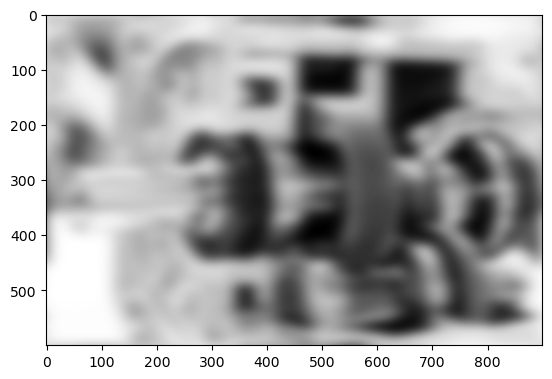

In [5]:
fft_img_mod = np.fft.ifftshift(fft_img_shift_blur)
img_mod = np.fft.ifft2(fft_img_mod)
img_mod = np.abs(img_mod)

plt.imshow(img_mod, cmap='gray')

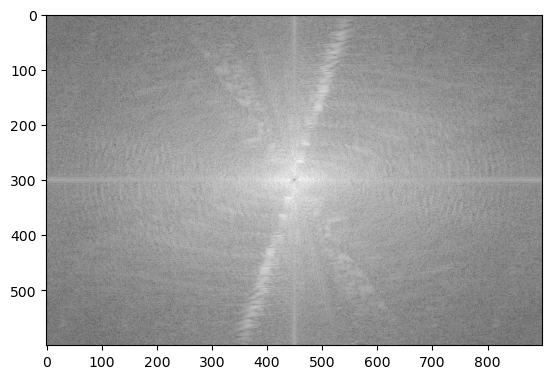

In [6]:
def invgaussian(image, d0=10):
    P, Q = image.shape
    U, V = np.mgrid[0:P, 0:Q]
    D = np.sqrt((U - P/2) ** 2 + (V - Q/2) ** 2)
    H = np.exp(-(D**2) / (2*(d0**2)))
    return np.multiply(image, 1 - H)

fft_img_shift_cnt = invgaussian(fft_img_shift)

plt.imshow(np.log1p(np.abs(fft_img_shift_cnt)), cmap='gray')

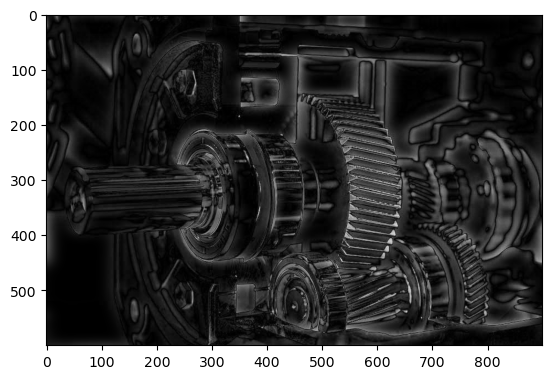

In [7]:
fft_img_mod = np.fft.ifftshift(fft_img_shift_cnt)
img_mod = np.fft.ifft2(fft_img_mod)
img_mod = np.abs(img_mod)

plt.imshow(img_mod, cmap='gray')